# Экспоненциальное распределение

Экспоненциа́льное (или показа́тельное) распределение — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.

Случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda > 0$, если её плотность вероятности задана функцией:
$$
    f_{X}(x) = 
    \begin{cases}
        \lambda e^{-\lambda x}, x\geq 0; \\
        0, x < 0.
    \end{cases}
$$
Отсюда функция экспоненциального распределения имеет следующий вид:
$$
    F_{X}(x) = 
    \begin{cases}
        1 - \lambda e^{-\lambda x}, x\geq 0; \\
        0, x < 0.
    \end{cases}
$$

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)

In [63]:
lambd = 2

first_collection = np.array([random.expovariate(lambd) for i in range(1000)])

Для созданной выборки выведем гистограмму:

Text(0.5, 0, '$x$')

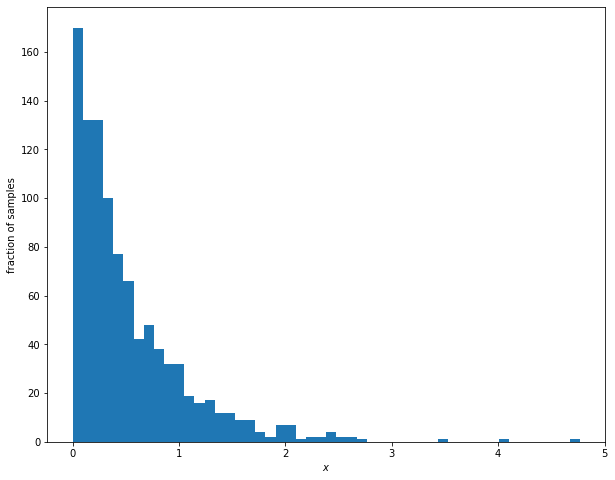

In [64]:
plt.hist(first_collection, bins = 50) 

plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Рассмотрим теоретическую функцию плотности вероятности экспоненциального распределения и эмпирическую оценку плотности, построенную по выборке с помощью ядерного сглаживания:

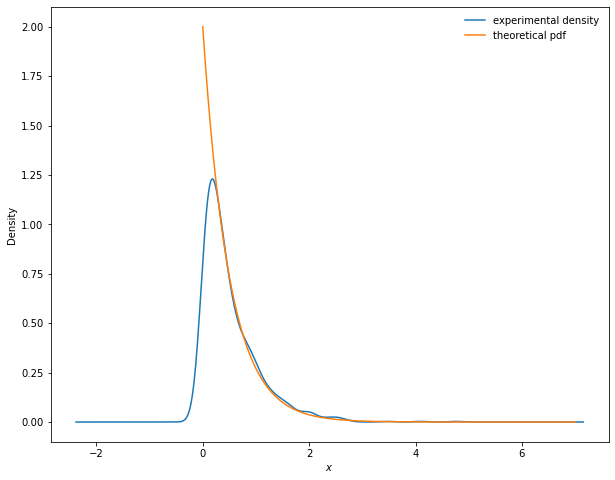

In [66]:
x = np.linspace(0, 7, 1000)
rv = sts.expon(scale=0.5)

df = pd.DataFrame(first_collection, columns=['experimental density'])
df.plot(kind='density')
plt.plot(x, rv.pdf(x), label='theoretical pdf')

plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)

В данном блоке оценим выборочное среднее для $1000$ выборок размера $n = 5, 10, 100, 500$. Ниже приведены гистограммы для каждого значения $n$.

In [124]:
n_arr = [5, 10, 100, 500]
collections = []
for n in n_arr:
    collections.append(np.array([np.array([random.expovariate(lambd) for i in range(n)]).mean() for j in range(1000)]))

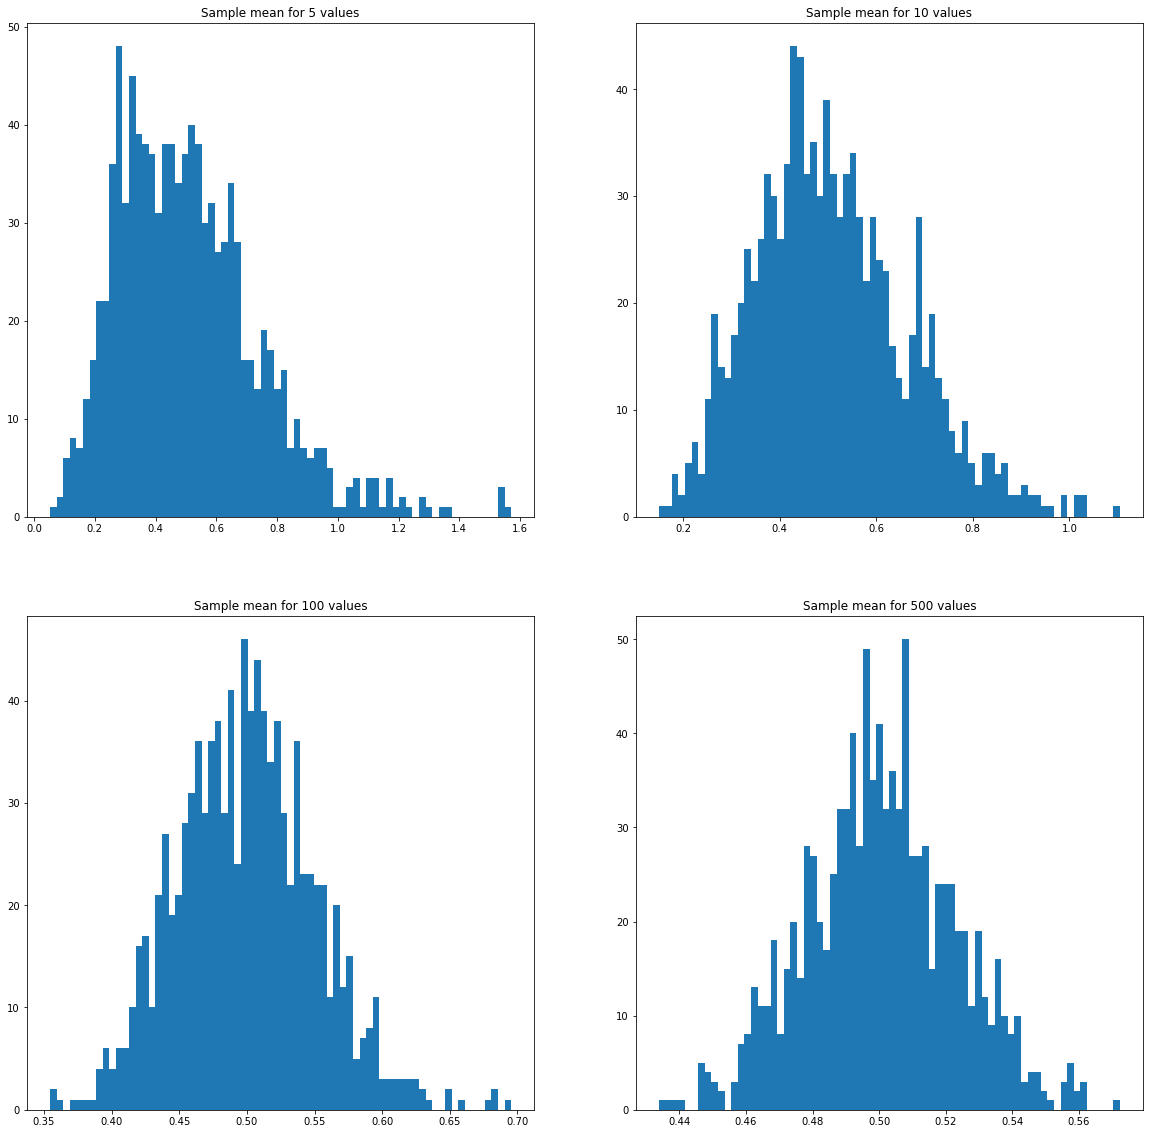

In [125]:
fig, axs = plt.subplots(2, 2)
for i in range(4):
    axs[i // 2, i % 2].hist(collections[i], bins=70)
    axs[i // 2, i % 2].set_title(f'Sample mean for {n_arr[i]} values')

Как видно из графиков, при увеличении количества элементов в выборке (для которой мы вычисляем выборочное среднее), распределение все больше приближается к нормальному. Действительно, из центральной предельной теоремы получаем, что распределение выборочных средних для экспоненциального распределения возможно приблизить следующим образом:
$$
    \overline{X_n} \approx \sim N\left(EX, \dfrac{DX}{n}\right) = N\left(\lambda^{-1}, \dfrac{\lambda^{-2}}{n}\right)
$$


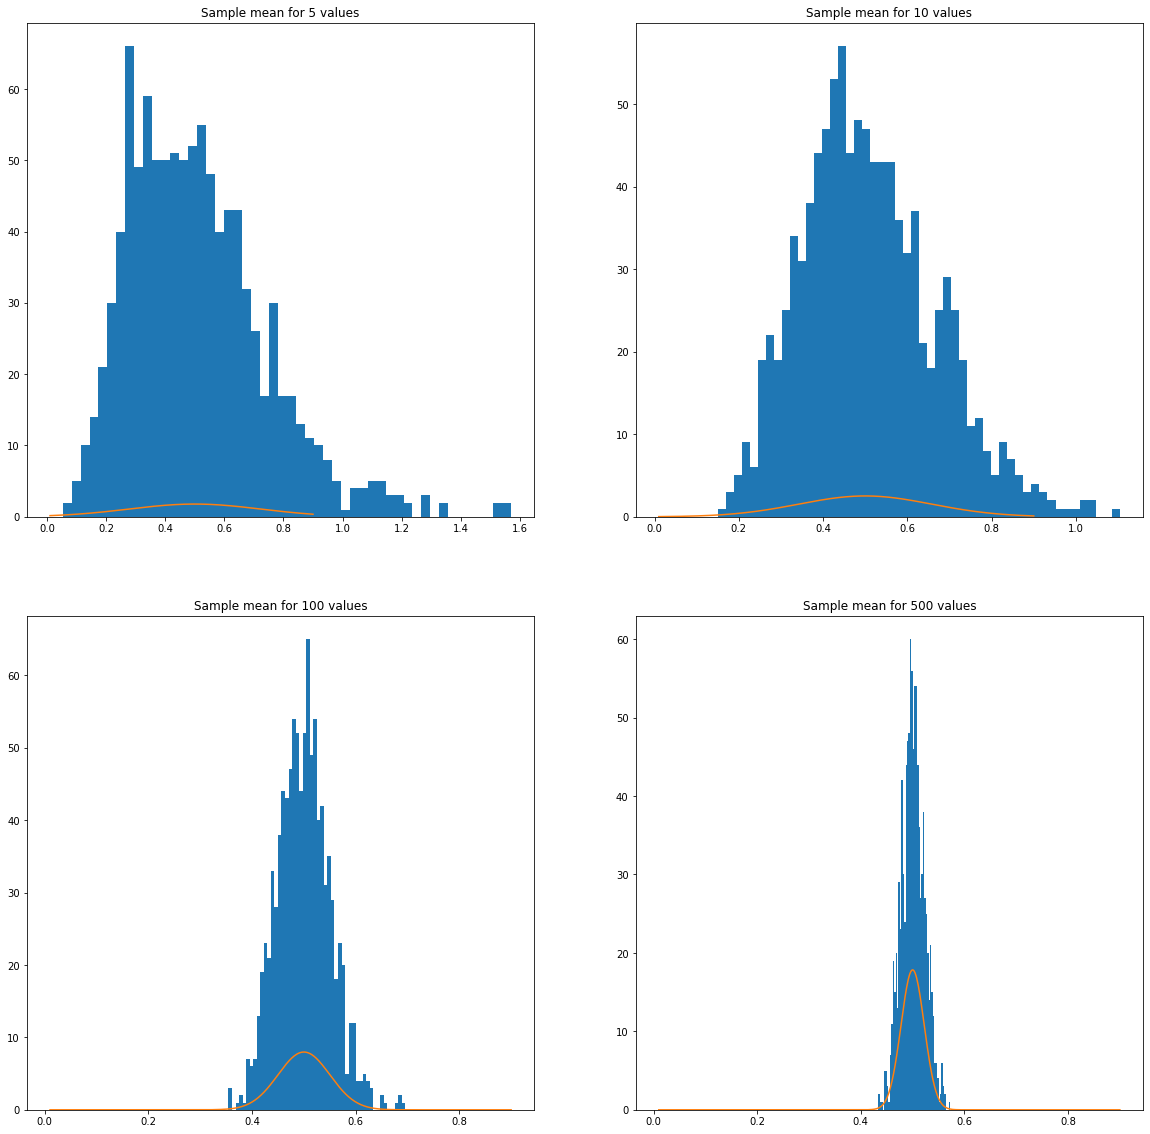

In [127]:
fig, axs = plt.subplots(2, 2)
x = np.linspace(0.01, 0.9, 600)
for i in range(4):
    axs[i // 2, i % 2].hist(collections[i], bins=50)
    axs[i // 2, i % 2].set_title(f'Sample mean for {n_arr[i]} values')
    axs[i // 2, i % 2].plot(x, sts.norm.pdf(x, lambd ** (-1), np.sqrt(lambd ** (-2) / n_arr[i])))